In [2]:
pip install ripser persim matplotlib numpy


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.4 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18104 sha256=a2c5d0c714f8451a8b9b8f64bbdf31768a47cbc03a7cd29ad676f40bf9fb3061
  Stored in directory: /root/.cache/pip/wheels/1f/cc/2d/de23a8b9ae586817b0b44de4a4b1a08f23473e248a644b312f
Successfully built hopcroftkarp


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


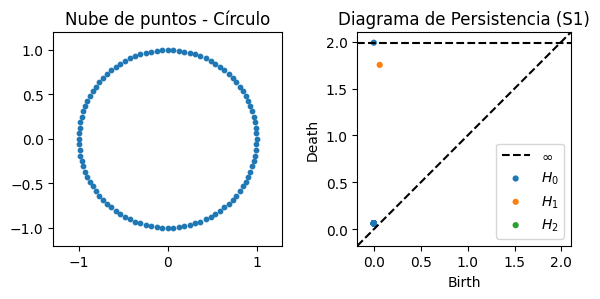

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import Rips
from persim import plot_diagrams
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

rips = Rips(maxdim=2)

# 1. Círculo en R2 (S1)
n_circle = 100
theta = np.linspace(0, 2 * np.pi, n_circle, endpoint=False)
circle_points = np.stack((np.cos(theta), np.sin(theta)), axis=1)
circle_diagrams = rips.fit_transform(circle_points)

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.scatter(circle_points[:, 0], circle_points[:, 1], s=10)
plt.title("Nube de puntos - Círculo")
plt.axis("equal")

plt.subplot(1, 2, 2)
plot_diagrams(circle_diagrams, show=False)
plt.title("Diagrama de Persistencia (S1)")
plt.tight_layout()
plt.show()


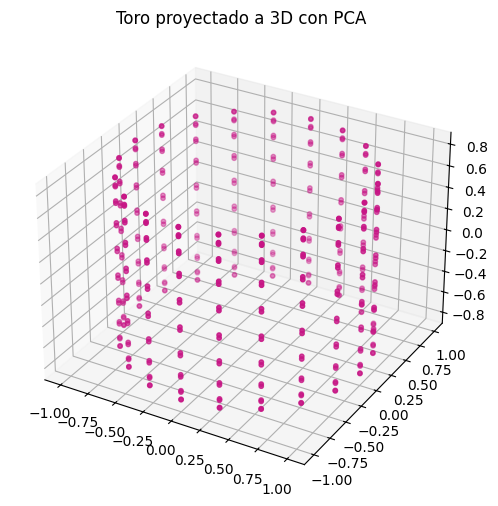

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


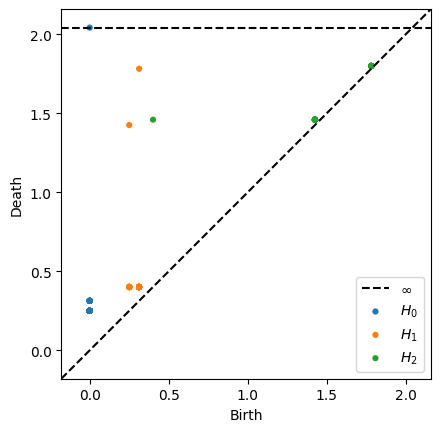

In [9]:
# 2. Generar puntos del toro en R⁴ (T² = S¹ × S¹)
n_torus = 20
pts = np.linspace(0, 2 * np.pi, n_torus, endpoint=False)
torus_points = np.zeros((n_torus * n_torus, 4))

for i in range(n_torus):
    for j in range(n_torus):
        torus_points[i + j * n_torus][0] = np.cos(pts[i])
        torus_points[i + j * n_torus][1] = np.sin(pts[i])
        torus_points[i + j * n_torus][2] = np.cos(pts[j]) * 0.8
        torus_points[i + j * n_torus][3] = np.sin(pts[j]) * 0.8

# Paso 2: Visualización 3D usando PCA
pca = PCA(n_components=3)
torus_3d = pca.fit_transform(torus_points)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(torus_3d[:, 0], torus_3d[:, 1], torus_3d[:, 2], s=10, c='mediumvioletred')
ax.set_title("Toro proyectado a 3D con PCA")
plt.show()

# Paso 3: Calcular y mostrar diagrama de persistencia
rips = Rips(maxdim=2)
diagrams = rips.fit_transform(torus_points)

# Solo una vez esta línea:
plot_diagrams(diagrams, show=True)


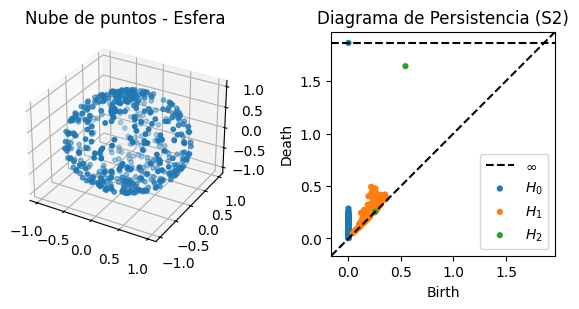

In [5]:
# 3. Esfera en R3 (S2)
n_sphere = 500
phi = np.random.uniform(0, np.pi, n_sphere)
theta_s = np.random.uniform(0, 2 * np.pi, n_sphere)
x = np.sin(phi) * np.cos(theta_s)
y = np.sin(phi) * np.sin(theta_s)
z = np.cos(phi)
sphere_points = np.stack((x, y, z), axis=1)
sphere_diagrams = rips.fit_transform(sphere_points)

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(x, y, z, s=10)
ax.set_title("Nube de puntos - Esfera")

plt.subplot(1, 2, 2)
plot_diagrams(sphere_diagrams, show=False)
plt.title("Diagrama de Persistencia (S2)")
plt.tight_layout()
plt.show()


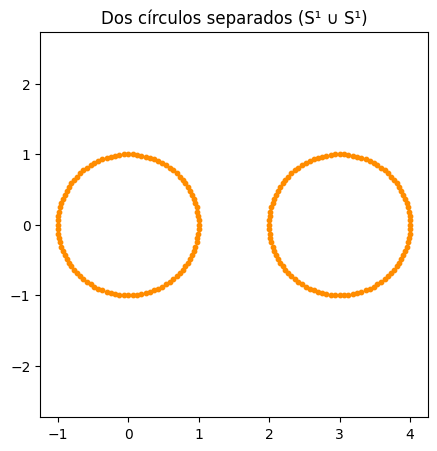

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


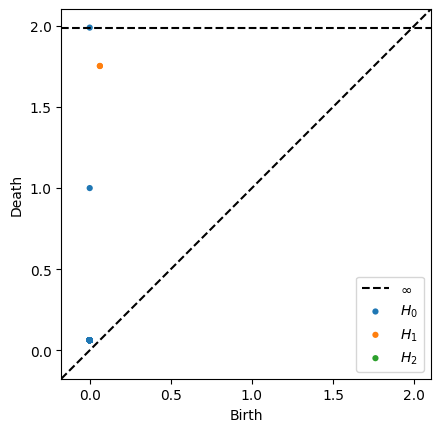

In [12]:
# 4. Generar dos círculos separados
n_points = 100
theta = np.linspace(0, 2 * np.pi, n_points, endpoint=False)

circle1 = np.stack((np.cos(theta), np.sin(theta)), axis=1)
circle2 = np.stack((np.cos(theta) + 3, np.sin(theta)), axis=1)  # segundo círculo desplazado

# Unir ambos círculos
double_circle = np.vstack((circle1, circle2))

# Visualización de la nube de puntos
plt.figure(figsize=(5, 5))
plt.scatter(double_circle[:, 0], double_circle[:, 1], s=10, c='darkorange')
plt.axis('equal')
plt.title("Dos círculos separados (S¹ ∪ S¹)")
plt.show()

# Calcular y mostrar el diagrama de persistencia
rips = Rips(maxdim=2)
diagrams = rips.fit_transform(double_circle)

# ✅ Esta es la única línea para graficar el diagrama, NO agregues plt.title ni plt.show después
plot_diagrams(diagrams, show=True)
